Top 5 Labels: {'Boeing 737': 267, 'Boeing 747': 133, 'A320': 133, 'A340': 133, 'Boeing 767': 100}
DataLoaders for top 5 labels created successfully.
Epoch [1/15], Train Loss: 1.5835, Test Loss: 1.5519, Train Acc: 0.3107, Test Acc: 0.3477
Epoch [2/15], Train Loss: 1.5526, Test Loss: 1.5616, Train Acc: 0.3499, Test Acc: 0.3477
Epoch [3/15], Train Loss: 1.5408, Test Loss: 1.5333, Train Acc: 0.3486, Test Acc: 0.3477
Epoch [4/15], Train Loss: 1.5135, Test Loss: 1.5537, Train Acc: 0.3486, Test Acc: 0.3477
Epoch [5/15], Train Loss: 1.4791, Test Loss: 1.5309, Train Acc: 0.3603, Test Acc: 0.3516
Epoch [6/15], Train Loss: 1.4451, Test Loss: 1.5270, Train Acc: 0.3864, Test Acc: 0.3542
Epoch [7/15], Train Loss: 1.3699, Test Loss: 1.5704, Train Acc: 0.4256, Test Acc: 0.3490
Epoch [8/15], Train Loss: 1.3156, Test Loss: 1.5017, Train Acc: 0.4530, Test Acc: 0.3633
Epoch [9/15], Train Loss: 1.2491, Test Loss: 1.5660, Train Acc: 0.5104, Test Acc: 0.3763
Epoch [10/15], Train Loss: 1.0991, Test Loss: 1.64

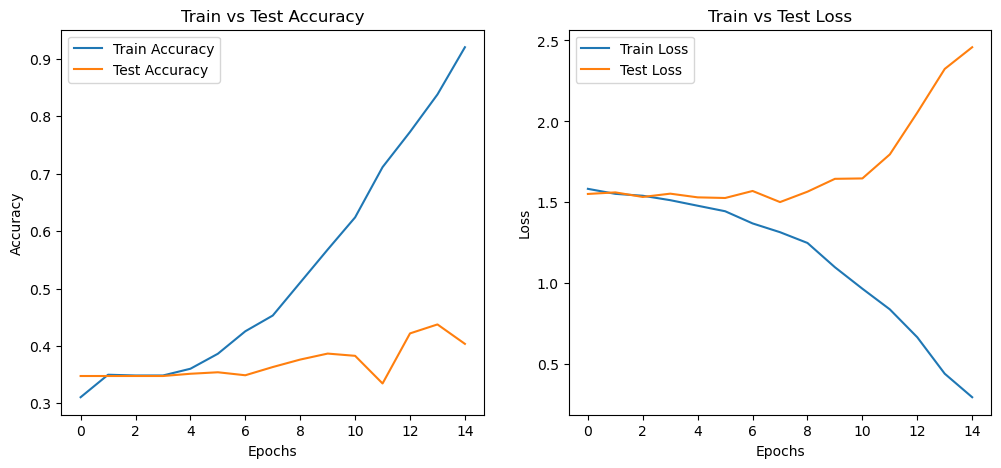

In [5]:
import os
import time
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

# Define the folder containing the images
image_folder = '/Users/louieburns/Library/CloudStorage/OneDrive-UniversityofLeeds/Year 3/AI and Machine Learning/Term 1/Coursework 1/Actual Coursework/dataoriginal/images'

# Paths to the text files
train_label_file = '/Users/louieburns/Library/CloudStorage/OneDrive-UniversityofLeeds/Year 3/AI and Machine Learning/Term 1/Coursework 1/Actual Coursework/dataoriginal/images_family_train.txt'
test_label_file = '/Users/louieburns/Library/CloudStorage/OneDrive-UniversityofLeeds/Year 3/AI and Machine Learning/Term 1/Coursework 1/Actual Coursework/dataoriginal/images_family_test.txt'
val_label_file = '/Users/louieburns/Library/CloudStorage/OneDrive-UniversityofLeeds/Year 3/AI and Machine Learning/Term 1/Coursework 1/Actual Coursework/dataoriginal/images_family_trainval.txt'

# Define label mapping
label_mapping = {
    "Boeing 707": 0,
    "Boeing 727": 1,
    "Boeing 737": 2,
    "Boeing 747": 3,
    "Boeing 757": 4,
    "Boeing 767": 5,
    "Boeing 777": 6,
    "A300": 7,
    "A310": 8,
    "A320": 9,
    "A330": 10,
    "A340": 11,
    "A380": 12,
    "ATR-42": 13,
    "ATR-72": 14,
    "An-12": 15,
    "BAE 146": 16,
    "BAE-125": 17,
    "Beechcraft 1900": 18,
    "Boeing 717": 19,
    "C-130": 20,
    "C-47": 21,
    "CRJ-200": 22,
    "CRJ-700": 23,
    "Cessna 172": 24,
    "Cessna 208": 25,
    "Cessna Citation": 26,
    "Challenger 600": 27,
    "DC-10": 28,
    "DC-3": 29,
    "DC-6": 30,
    "DC-8": 31,
    "DC-9": 32,
    "DH-82": 33,
    "DHC-1": 34,
    "DHC-6": 35,
    "Dash 8": 36,
    "DR-400": 37,
    "Dornier 328": 38,
    "Embraer E-Jet": 39,
    "EMB-120": 40,
    "Embraer ERJ 145": 41,
    "Embraer Legacy 600": 42,
    "Eurofighter Typhoon": 43,
    "F-16": 44,
    "F/A-18": 45,
    "Falcon 2000": 46,
    "Falcon 900": 47,
    "Fokker 100": 48,
    "Fokker 50": 49,
    "Fokker 70": 50,
    "Global Express": 51,
    "Gulfstream": 52,
    "Hawk T1": 53,
    "Il-76": 54,
    "L-1011": 55,
    "MD-11": 56,
    "MD-80": 57,
    "MD-90": 58,
    "Metroliner": 59,
    "King Air": 60,
    "PA-28": 61,
    "SR-20": 62,
    "Saab 2000": 63,
    "Saab 340": 64,
    "Spitfire": 65,
    "Tornado": 66,
    "Tu-134": 67,
    "Tu-154": 68,
    "Yak-42": 69
}

# Define transformations for image processing
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to 128x128
    transforms.RandomHorizontalFlip(),  # Apply random horizontal flip
    transforms.RandomRotation(15),  # Random rotation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Apply color jitter
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

def count_labels(label_file):
    label_counts = Counter()
    with open(label_file, "r") as f:
        for line in f:
            parts = line.strip().split(maxsplit=1)
            if len(parts) == 2:
                _, label = parts
                label_counts[label] += 1
    return label_counts

def filter_data(label_file, top_labels):
    image_data = []
    labels = []

    with open(label_file, "r") as f:
        for line in f:
            parts = line.strip().split(maxsplit=1)
            if len(parts) != 2:
                continue  # Skip malformed lines
            filename, label = parts
            if label in top_labels:
                image_path = os.path.join(image_folder, filename + ".jpg")
                try:
                    if os.path.exists(image_path):
                        image = Image.open(image_path).convert("RGB")
                        image_tensor = transform(image)
                        image_data.append(image_tensor)
                        labels.append(top_labels[label])
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

    # Convert lists to PyTorch tensors
    image_tensor = torch.stack(image_data)
    label_tensor = torch.tensor(labels, dtype=torch.long)

    return image_tensor, label_tensor

# Count and select top 5 labels
label_counts = count_labels(train_label_file)
top_5_labels = dict(label_counts.most_common(5))
print("Top 5 Labels:", top_5_labels)

# Remap top labels to sequential indices
label_mapping_top5 = {label: idx for idx, (label, _) in enumerate(top_5_labels.items())}

# Process training, validation, and test data for top 5 labels
train_image_tensor, train_label_tensor = filter_data(train_label_file, label_mapping_top5)
val_image_tensor, val_label_tensor = filter_data(val_label_file, label_mapping_top5)
test_image_tensor, test_label_tensor = filter_data(test_label_file, label_mapping_top5)

# Create TensorDatasets
train_dataset = TensorDataset(train_image_tensor, train_label_tensor)
val_dataset = TensorDataset(val_image_tensor, val_label_tensor)
test_dataset = TensorDataset(test_image_tensor, test_label_tensor)

# Example usage of DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
print("DataLoaders for top 5 labels created successfully.")

# Define the CNN model
class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.4)
        self.fc1 = nn.Linear(256 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, len(top_5_labels))
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 256 * 16 * 16)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

# Instantiate the enhanced model
model = EnhancedCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Reduced learning rate for finer adjustments

# Training loop with validation
num_epochs = 15
history = {'train_loss': [], 'test_loss': [], 'train_acc': [], 'test_acc': []}
total_start_time = time.time()  # Start timing the entire process

for epoch in range(num_epochs):
    epoch_start_time = time.time()  # Start timing the epoch

    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    history['train_loss'].append(running_loss / len(train_loader))
    history['train_acc'].append(train_accuracy)

    # Evaluate on test data
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test
    history['test_loss'].append(test_loss / len(test_loader))
    history['test_acc'].append(test_accuracy)

    epoch_duration = time.time() - epoch_start_time  # Calculate epoch duration
    remaining_time = epoch_duration * (num_epochs - epoch - 1)  # Estimate remaining time
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss/len(train_loader):.4f}, Test Loss: {test_loss/len(test_loader):.4f}, Train Acc: {train_accuracy:.4f}, Test Acc: {test_accuracy:.4f}, Time Remaing: {remaining_time:.4f}")

# Calculate total training time
total_time = time.time() - total_start_time
print(f"Total training time: {total_time/60:.2f} minutes")

# Plot the training and test accuracy and loss
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['test_acc'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()

plt.show()
